In [2]:
import cv2

In [3]:
img = cv2.imread("Images/dog.jpg")

(-0.5, 767.5, 575.5, -0.5)

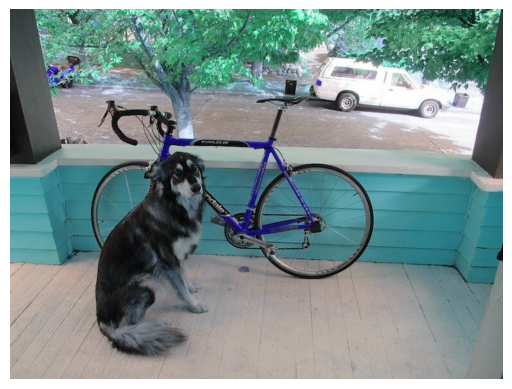

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis(False)

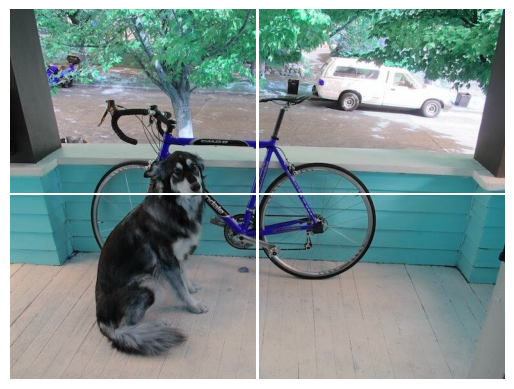

In [5]:
height, width, channels = img.shape
 
half_w = width//2
half_h = height//2

left_up_part = img[:half_h, :half_w] 
left_down_part = img[half_h:, :half_w] 

right_up_part = img[:half_h, half_w:]  
right_down_part = img[half_h:, half_w:]

plt.subplot(2,2,1)
plt.axis(False)
plt.imshow(left_up_part)

plt.subplot(2,2,2)
plt.axis(False)
plt.imshow(right_up_part)

plt.subplot(2,2,3)
plt.axis(False)
plt.imshow(left_down_part)

plt.subplot(2,2,4)
plt.axis(False)
plt.imshow(right_down_part)

plt.subplots_adjust(wspace=0.01, hspace=0.01)

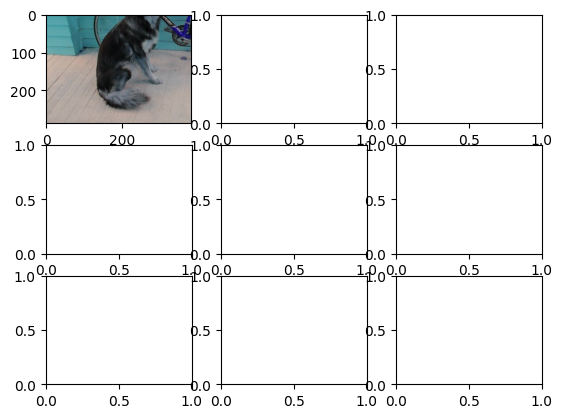

In [6]:
fig, axs = plt.subplots(3,3)

axs[0,0].imshow(left_down_part)

In [7]:
list(range(1,4,1))
n=3

for w in range(1,n+1,1):
    print(w)

1
2
3


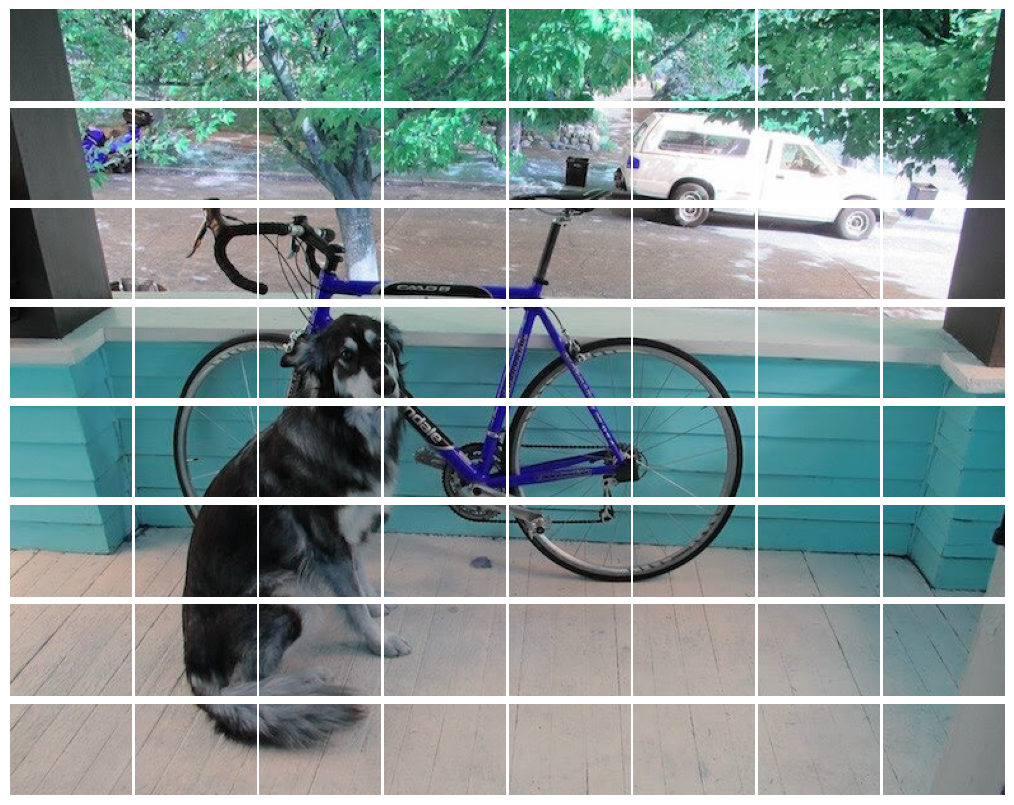

In [8]:
n=8


h_pieces = height//n
w_pieces = width//n

fig, axs = plt.subplots(n,n,figsize=(10, 8))

for w in range(1,n+1,1): # w = 1,2,3
    for h in range(1,n+1,1): # h = 1,2,3
        axs[h-1,w-1].imshow(img[(h-1)*h_pieces:h*h_pieces,(w-1)*w_pieces:w*w_pieces])
        
for ax in axs.flat:
    ax.axis('off')  

plt.tight_layout(pad=0.2)

[0:h_pieces,0:w_pieces] - [0:h_pieces,w_pieces:2*w_pieces] ...   [0:h_pieces,w_pieces*(n-1):w_pieces*n]
[h_pieces:2*h_pieces,0:w_pieces1] ...
.
.
.
[h_pieces*(n-1):n*h_pieces,0:w_pieces1] ...

In [9]:
P=64
n_rows = width//P
n_cols = height//P

h_pieces = P
w_pieces = P

n_rows,n_cols,width,height,list(range(1,n_rows+1,1))

(12, 9, 768, 576, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

4

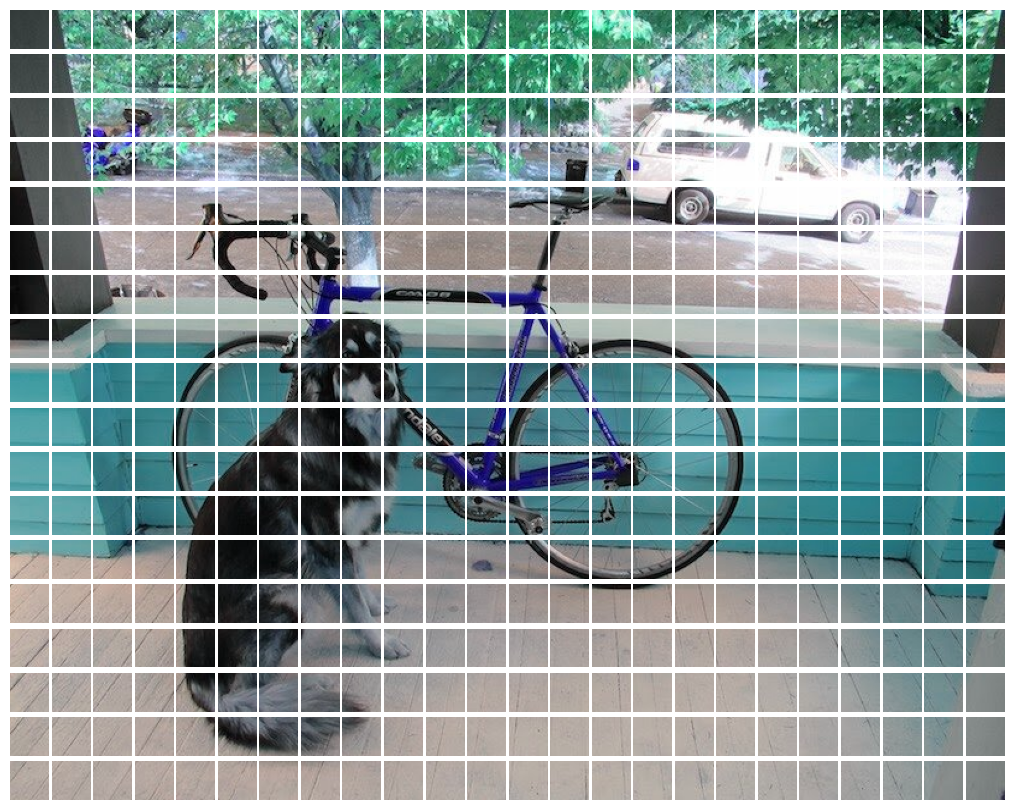

In [10]:
P=32
n_rows = width//P
n_cols = height//P

h_pieces = P
w_pieces = P

fig, axs = plt.subplots(n_cols,n_rows,figsize=(10, 8))

for w in range(1,n_rows+1,1): # w = 1,2,3
    for h in range(1,n_cols+1,1): # h = 1,2,3
        axs[h-1,w-1].imshow(img[(h-1)*h_pieces:h*h_pieces,(w-1)*w_pieces:w*w_pieces])
        
for ax in axs.flat:
    ax.axis('off')  

plt.tight_layout(pad=0.2)
4

In [11]:
img

array([[[ 50,  58,  57],
        [ 50,  58,  57],
        [ 51,  59,  58],
        ...,
        [ 59, 101, 114],
        [ 33,  59,  76],
        [ 42,  59,  80]],

       [[ 50,  58,  57],
        [ 50,  58,  57],
        [ 51,  59,  58],
        ...,
        [ 48,  90, 102],
        [ 32,  58,  75],
        [ 42,  59,  78]],

       [[ 51,  59,  58],
        [ 51,  59,  58],
        [ 51,  59,  58],
        ...,
        [ 21,  65,  72],
        [ 27,  54,  68],
        [ 30,  50,  67]],

       ...,

       [[180, 169, 161],
        [180, 169, 161],
        [184, 173, 165],
        ...,
        [ 62,  62,  78],
        [ 35,  34,  54],
        [ 57,  56,  76]],

       [[182, 172, 162],
        [181, 171, 161],
        [173, 163, 153],
        ...,
        [ 55,  55,  71],
        [ 39,  38,  58],
        [ 59,  57,  79]],

       [[175, 165, 155],
        [180, 170, 160],
        [171, 161, 151],
        ...,
        [ 67,  67,  85],
        [ 42,  41,  61],
        [ 34,  32,  54]]

In [12]:
import numpy as np

def visualize_patches(img: np.array,
                      patch_size: int):
    
    height, width , _ = img.shape

    assert height & patch_size == 0 , f"Image Sizes must compatible with Patch size, Heigh: {height} not divisible in Patch Size: {patch_size}"
    assert width & patch_size == 0 , f"Image Sizes must compatible with Patch size, Width: {height} not divisible in Patch Size: {patch_size}"
    print(f"Image Size: [H,W] -> [{height},{width}] is compatible with patch size -> {patch_size}")

    n_rows = width//patch_size
    n_cols = height//patch_size

    fig, axs = plt.subplots(n_cols,n_rows,figsize=(10, 8))

    for w in range(1,n_rows+1,1): # w = 1,2,3 ... n_rows
        for h in range(1,n_cols+1,1): # h = 1,2,3 ... n_cols
            axs[h-1,w-1].imshow(img[(h-1)*patch_size:h*patch_size,(w-1)*patch_size:w*patch_size])

    for ax in axs.flat:
        ax.axis('off')  

    plt.tight_layout(pad=0.2)
    

Image Size: [H,W] -> [576,768] is compatible with patch size -> 32


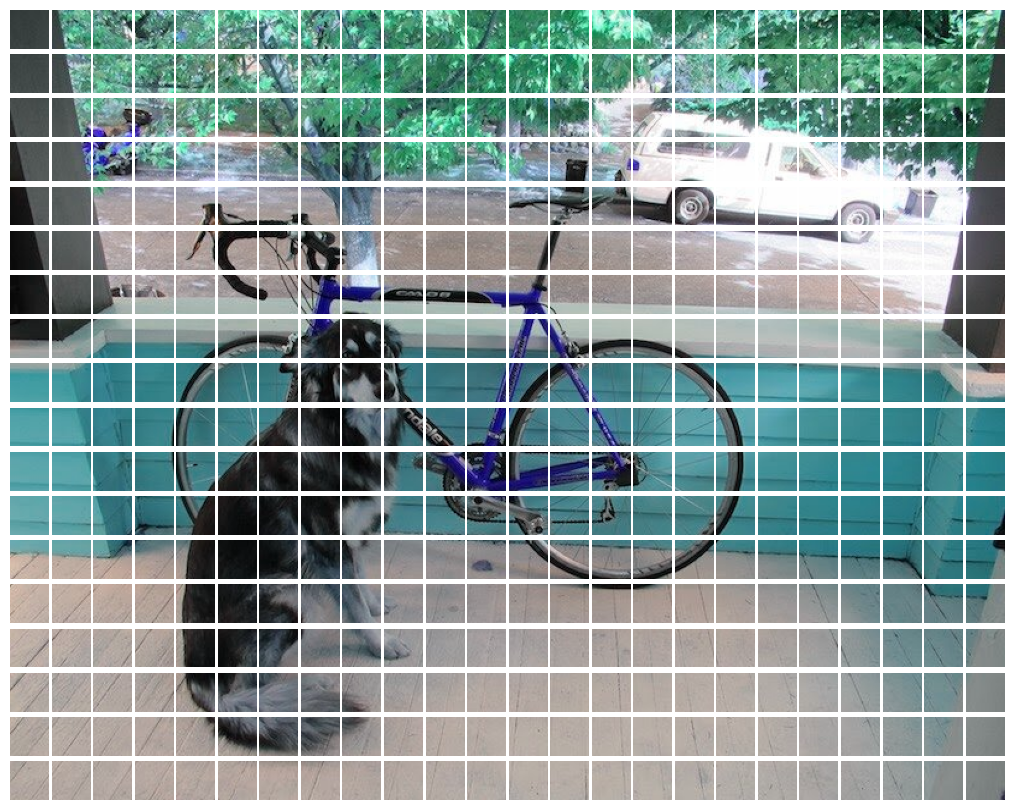

In [13]:
visualize_patches(img,32)

In [33]:
import torch.nn as nn
from torchvision import transforms
import torch
P=16
D=768

conv_operation = nn.Conv2d(in_channels=3,
          out_channels=D,
          kernel_size=P,
          stride=P)

transform_pipeline=transforms.Compose([
    conv_operation
])

resize_pipeline=transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224,224))
])

flatten_pipeline= transforms.Compose([
    nn.Flatten(start_dim=2,
               end_dim=3)
])

img_resized = resize_pipeline(img)
print(f"Image size After resized: {img_resized.shape}")
print("**********************************************************************************")

img_added_batch = img_resized.unsqueeze(0)
print(f"Image Size After Batch Size Added: {img_added_batch.shape}")
print("**********************************************************************************")

after_conv = transform_pipeline(img_added_batch)
print(f"After Convolution Applied: {after_conv.shape} -> [1,D,N,N]")
print("**********************************************************************************")

after_flat = flatten_pipeline(after_conv)
after_flat = after_flat.permute(0,2,1)
print(f"After Flatten Applied: {after_flat.shape} -> [1,P*P*C,D]")
print(after_flat)
print("**********************************************************************************")


batch_size = after_flat.shape[0]
embedding_dim = after_flat.shape[-1]
x_class = nn.Parameter(torch.ones((batch_size,1,embedding_dim)),
                       requires_grad=True)


x_with_class_embedding = torch.cat((x_class,after_flat),dim=1)
print(f"Shape of Class Embeddings: {x_class.shape}")
print(f"Shape after Class Embedding added: {x_with_class_embedding.shape} -> [1,P*P*C+1,D]")
print(x_with_class_embedding)
print("**********************************************************************************")


number_of_patches = int((img_resized.shape[1]*img_resized.shape[2])/P**2)
embedding_dim = x_with_class_embedding.shape[-1]

x_pos = nn.Parameter(torch.randn(1,number_of_patches+1,embedding_dim),
                                 requires_grad=True)
print(f"Positional Embedding Shape: {x_pos.shape}")
x_final_input = torch.add(x_pos,x_with_class_embedding)
print(f"Shape after Position Embedding added: {x_final_input.shape}")
print(x_final_input)


Image size After resized: torch.Size([3, 224, 224])
**********************************************************************************
Image Size After Batch Size Added: torch.Size([1, 3, 224, 224])
**********************************************************************************
After Convolution Applied: torch.Size([1, 768, 14, 14]) -> [1,D,N,N]
**********************************************************************************
After Flatten Applied: torch.Size([1, 196, 768]) -> [1,P*P*C,D]
tensor([[[-0.2333, -0.1892, -0.0963,  ...,  0.3450, -0.1330,  0.1349],
         [-0.0687, -0.3800, -0.0474,  ...,  0.1095, -0.1986,  0.1201],
         [-0.1977, -0.4148, -0.0981,  ...,  0.2061, -0.2239,  0.1321],
         ...,
         [-0.2511, -0.5662, -0.0470,  ...,  0.1851, -0.3705,  0.0890],
         [-0.2309, -0.5255, -0.0177,  ...,  0.1432, -0.3217,  0.0958],
         [-0.2017, -0.4746, -0.0290,  ...,  0.1087, -0.2967,  0.0742]]],
       grad_fn=<PermuteBackward0>)
*************************